<a href="https://colab.research.google.com/github/julioaguiar07/TRATAMENTO-GASOLINA-BRASIL-2024/blob/main/GASOLINA_ETANOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install summarytools

In [ ]:
import pandas as pd
from summarytools import dfSummary
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
janeiro = pd.read_csv("janeiro.csv", sep=";")

In [ ]:
janeiro["Valor de Venda"] = janeiro["Valor de Venda"].str.replace(",", ".").astype(float)

In [ ]:
janeiro["Regiao - Sigla"] = janeiro["Regiao - Sigla"].replace({
    "N": "Norte",
    "NE": "Nordeste",
    "CO": "Centro-Oeste",
    "SE": "Sudeste",
    "S": "Sul"
})

In [ ]:
janeiro

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,Nordeste,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA,01/01/2024,5.68,NaN,R$ / litro,VIBRA
1,Nordeste,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,GASOLINA ADITIVADA,01/01/2024,5.68,NaN,R$ / litro,VIBRA
2,Nordeste,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,01/01/2024,3.99,NaN,R$ / litro,VIBRA
3,Nordeste,AL,ARAPIRACA,AUTO POSTO SAO FRANCISCO LTDA,12.706.529/0001-04,RUA SAO FRANCISCO,274,NaN,CENTRO,57300-080,GASOLINA,01/01/2024,5.48,NaN,R$ / litro,VIBRA
4,Nordeste,AL,ARAPIRACA,IBN PINTO E SILVA & CIA LTDA,01.242.690/0001-58,RODOVIA AL-110,678,KM 70,CANAFISTULA,57302-802,GASOLINA,01/01/2024,5.69,NaN,R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59860,Nordeste,BA,JAGUAQUARA,JAGUAQUARA COMERCIO DE COMBUSTIVEIS E LUBRIFIC...,10.503.164/0001-95,RUA RUI BARBOSA,655,NaN,CENTRO,45345-000,GASOLINA,31/01/2024,5.29,NaN,R$ / litro,BRANCA
59861,Nordeste,BA,JAGUAQUARA,JAGUAQUARA COMERCIO DE COMBUSTIVEIS E LUBRIFIC...,10.503.164/0001-95,RUA RUI BARBOSA,655,NaN,CENTRO,45345-000,ETANOL,31/01/2024,3.99,NaN,R$ / litro,BRANCA
59862,Sul,RS,VACARIA,SIM REDE DE POSTOS LTDA,07.473.735/0207-00,AVENIDA MILITAR,2484,NaN,JARDIM AMERICA,95214-086,GASOLINA,31/01/2024,5.63,NaN,R$ / litro,RAIZEN
59863,Sul,RS,VACARIA,SIM REDE DE POSTOS LTDA,07.473.735/0207-00,AVENIDA MILITAR,2484,NaN,JARDIM AMERICA,95214-086,GASOLINA ADITIVADA,31/01/2024,5.93,NaN,R$ / litro,RAIZEN


In [ ]:
janeiro = janeiro.drop(["Nome da Rua", "Numero Rua", "Complemento", "Unidade de Medida", "Valor de Compra" ], axis=1)

In [ ]:
dfSummary(janeiro)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Regiao - Sigla[object],1. Sudeste2. Nordeste3. Sul4. Centro-Oeste5. Norte,"29,222 (48.8%)12,271 (20.5%)10,208 (17.1%)4,328 (7.2%)3,836 (6.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAj9JREFUeJzt28Fp41AYhdFfgwmTjYQxuBgXMcVOEerGGGuRhGw8i2lAssJ9Fjqngof5kJB5t3s8HgUJv1ofgP0QGzFiI6arqveqemt9kA35fjwen60PsUWH0+n0p+/7Y+uDbMU0Tbeu6/4KbrlD3/fHy+XyOQzDV+vDvLr7/f57HMfj9Xp9qyqxLXSoqhqG4et8Pn+0PsxGvLc+wFb5QCBGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2Yg5V/6/OtD7IFvid1jlM03Qbx/FYrs7MMk3Traq+W59ji1wLX8618Cd1dqOk+EAg5hVeo15LO9F8XWWttB9N11XWSvvyCusqf7nshA8EYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiOm6brKWmlfmq+rrJX2w7VwYqyriPGBQEzyNep1uXOxdZUVFZF1lRUVVdl1lRXVzvlAIEZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiIusqKyqqgusqKypcCyfGuoqYpU82TyeetmjwYrTCGrMHL0YrrLV08GK0wtP8qUuM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNmNnrKgsp1lq0rrKQYg0bBGKsq4hZ8mTzVGOV2esqyyrWmrWusqziJyxZV1lWsYo/dYkRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERM2tdZVnFT5i9rrKsYi0bBGKsq4jxgUCM2Ij5B8cxDjctrn6fAAAAAElFTkSuQmCC"">",0(0.0%)
2,Estado - Sigla[object],1. SP2. MG3. RJ4. PR5. RS6. BA7. SC8. PE9. GO10. CE11. other,"16,941 (28.3%)6,468 (10.8%)4,631 (7.7%)3,986 (6.7%)3,900 (6.5%)3,458 (5.8%)2,322 (3.9%)2,241 (3.7%)2,202 (3.7%)1,926 (3.2%)11,790 (19.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAABBRJREFUeJzt3UFuGlkARdFPC0WdCciy5MV4Eb3YXgS7sSwzSKJM6EEPA3ZBFRchzllBDa6+VaX/zOpwOAwo/HXrB+BxiI2M2MiIjYzYyIiNjNjIiI2M2Misxhjfxxjfbv0gZ/h9OBx+3vohON/6+fn5n81m83TrB5lqv9+/r1arfwV3f9abzebp9fX153a7/XXrh/nKx8fH37vd7unt7e3bGENsd2Y9xhjb7fbXy8vLj1s/zETfb/0AXMYLAhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkVmP8f89sVs/yBT38pwct97v9++73e5p3Mk9sf1+/z7G+H3r5+B8NghkVv5lFpWlTjanDV9aZF1l8cQUs9dVFk9MtdS66i7eZLktH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIzB68GKEw1SKDFyMUpnAtnIzBC5lLTjanGBc5e/Bi3MKlzhq8GLcwxyWDF+MWLuKjLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mzBi/GLcxx9uDFuIVLuRZOxuCFjBcEMuf8GfXnk1kmr6usqphr0rrKqoolnLOusqpiFi8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZCatq6yqWMLkdZVVFXO5Fk7GuoqMk42MwQsZgxcyBi9kfNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjGvhZAxeyEw92ZxqzDZp8GLswhK+HLwYu7CUqYMXYxdm81GXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIfLmusqxiKZPWVZZVLMEGgYx1FZnPTjanGYs6ua6yqGJpR9dVFlVcw2frKosqFuWjLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5mjgxcjF67h5ODFyIWluRZOxuCFjJONjMELGYMXMgYvZHzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxr4WQMXsh4QSDjzygZ6yoy1lVkrKvIeEEgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjGvhZKyryJw62ZxqLO7o4MXYhWv4Y/Bi7MK1nBq8GLuwOB91yYiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyPwxeDF24VqODl6MXbgG18LJGLyQ+WzKV3CCPpCTv/BSMKx5LEd/4aVgWPN4PvuFl4JhzQPxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3M0V94KRjWPJ6Tv/BSMKx5LK6FkzF4IeMFgYzYyIiNjNjIiI2M2MiIjYzYyIiNzH8lNk7iXiJWtwAAAABJRU5ErkJggg=="">",0(0.0%)
3,Municipio[object],1. SAO PAULO2. RIO DE JANEIRO3. CURITIBA4. BELO HORIZONTE5. FORTALEZA6. BRASILIA7. MANAUS8. GOIANIA9. SALVADOR10. PORTO ALEGRE11. other,"2,775 (4.6%)1,047 (1.7%)619 (1.0%)554 (0.9%)537 (0.9%)534 (0.9%)507 (0.8%)462 (0.8%)403 (0.7%)399 (0.7%)52,028 (86.9%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAABCVJREFUeJzt3EFOImkAhuFfQpx2U4SQeAwPwCE87ByCA3gPY6hF47hxFq0du6OzEV5nmOfZ2SSkFm8KqPxfXzw/Pw8oLL76Avj/EBsZsZERGxmxkREbGbGRERsZsZG5GGNcjTEuP3j96fn5+RBeD2dsudlsbqdpWr/34jzPDxcXF38KjmNYTtO03m63h9Vq9fj2hf1+/223263v7+8vxxhi49OWY4yxWq0er6+vv7/z+lV8PZwxPxDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI3McowfZ9d+f+G9f4PPWM7z/LDb7dbjnbNr8zw/jDGe+sviHNkgkLnwX2ZR+f3O5k7GyfyyrrKm4pQWr+uq7XZ7eInuo+9v8Ck/11Uvf1tTcTIe6pIRGxmxkREbGbGRERsZsZERGxmxk

In [ ]:
media_por_regiao = janeiro.groupby("Regiao - Sigla")["Valor de Venda"].mean().sort_values(ascending=False)
print(media_por_regiao)

Regiao - Sigla
Norte           5.691491
Sul             5.299627
Nordeste        5.196738
Centro-Oeste    4.854025
Sudeste         4.853085
Name: Valor de Venda, dtype: float64


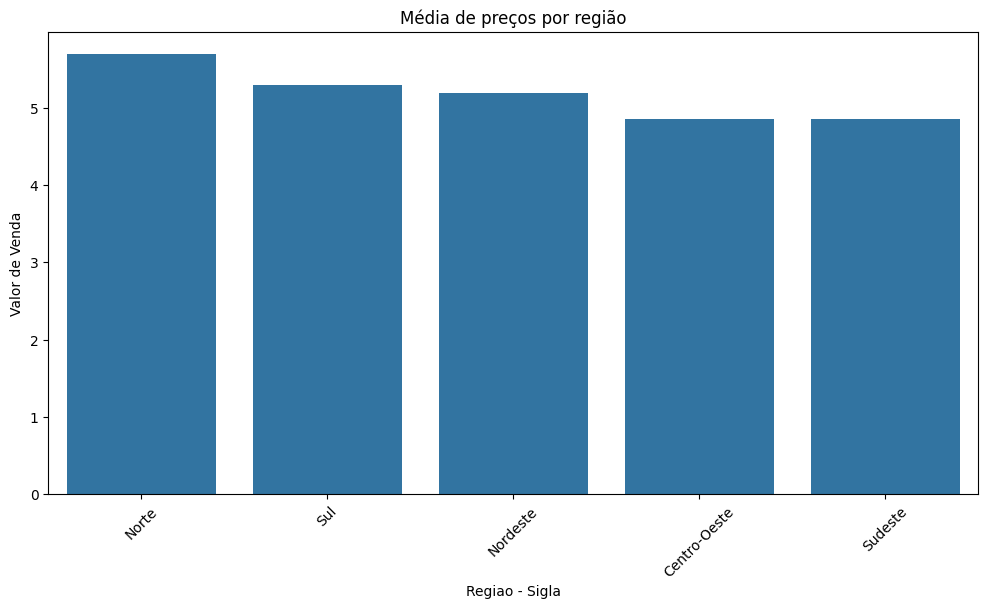

In [ ]:
plt.figure(figsize=(12, 6))  # Tamanho do gráfico
sns.barplot(data=media_por_regiao.reset_index(), x="Regiao - Sigla", y="Valor de Venda")
plt.xticks(rotation=45)  # Gira os nomes das bandeiras pra não ficar bagunçado
plt.title("Média de preços por região")
plt.show()

In [ ]:
media_por_bandeira = janeiro.groupby("Bandeira")["Valor de Venda"].mean().sort_values(ascending=False)
print(media_por_bandeira)

Bandeira
EQUADOR                 6.037674
SUL COMBUSTÍVEIS        5.935000
DIBRAPE                 5.880000
REJAILE                 5.820000
RDP ENERGIA             5.820000
ATEM' S                 5.646402
SABBÁ                   5.508558
RAIZEN MIME             5.484734
SP                      5.480519
MAXSUL                  5.478519
IDAZA                   5.427619
CHARRUA                 5.403081
RODOIL                  5.353359
WALENDOWSKY             5.353333
PETROBAHIA              5.305294
POTENCIAL               5.285750
ATLÂNTICA               5.264085
ON PETRO                5.230909
TEMAPE                  5.203571
PELIKANO                5.203333
VIBRA                   5.201959
ESTRADA                 5.156667
UNI                     5.146667
IPIRANGA                5.142978
FAN                     5.139200
DISLUB                  5.135200
RAIZEN                  5.059615
RZD DISTRIBUIDORA       5.041852
PETROX DISTRIBUIDORA    5.030256
RIO BRANCO              5.008750
A

In [ ]:
nordeste = janeiro[janeiro["Regiao - Sigla"] == "Nordeste"]
media_nordeste_bandeira = nordeste.groupby("Bandeira")["Valor de Venda"].mean().sort_values(ascending=False)
print(media_nordeste_bandeira)

Bandeira
SP                      5.480519
PETROBAHIA              5.305294
IPIRANGA                5.278893
RAIZEN                  5.265046
ALESAT                  5.239148
TEMAPE                  5.203571
VIBRA                   5.170494
BRANCA                  5.170397
FAN                     5.139200
DISLUB                  5.135200
SABBÁ                   5.039915
PETROX DISTRIBUIDORA    5.030256
SETTA DISTRIBUIDORA     4.975000
LARCO                   4.904091
TDC DISTRIBUIDORA       4.861333
FEDERAL ENERGIA         4.666429
Name: Valor de Venda, dtype: float64


In [ ]:
ceara = janeiro[janeiro["Estado - Sigla"] == "CE"]
media_ceara_bandeira = ceara.groupby("Bandeira")["Valor de Venda"].mean().sort_values(ascending=False)
print(media_ceara_bandeira)

Bandeira
SP          5.540826
IPIRANGA    5.534912
RAIZEN      5.479050
ALESAT      5.438652
BRANCA      5.427418
VIBRA       5.410902
Name: Valor de Venda, dtype: float64


In [ ]:
media_por_tipo = janeiro.groupby("Produto")["Valor de Venda"].mean().sort_values(ascending=False)
print(media_por_tipo)

Produto
GASOLINA ADITIVADA    5.800728
GASOLINA              5.608683
ETANOL                3.702000
Name: Valor de Venda, dtype: float64


In [ ]:
fortaleza = janeiro[janeiro["Municipio"] == "FORTALEZA"]
media_fortaleza_bairro = ceara.groupby("Bairro")["Valor de Venda"].mean().sort_values(ascending=False)
print(media_fortaleza_bairro)

Bairro
VARJOTA                       5.980000
COMBATE                       5.980000
AREIAS                        5.967000
SALESIANOS                    5.870000
CAJAS                         5.840000
                                ...   
PINTO MADEIRA                 4.890000
NOVO JUAZEIRO                 4.794000
FRANCISCANOS                  4.790000
LEANDRO BEZERRA DE MENESES    4.774000
SANTA TERESA                  4.721667
Name: Valor de Venda, Length: 160, dtype: float64


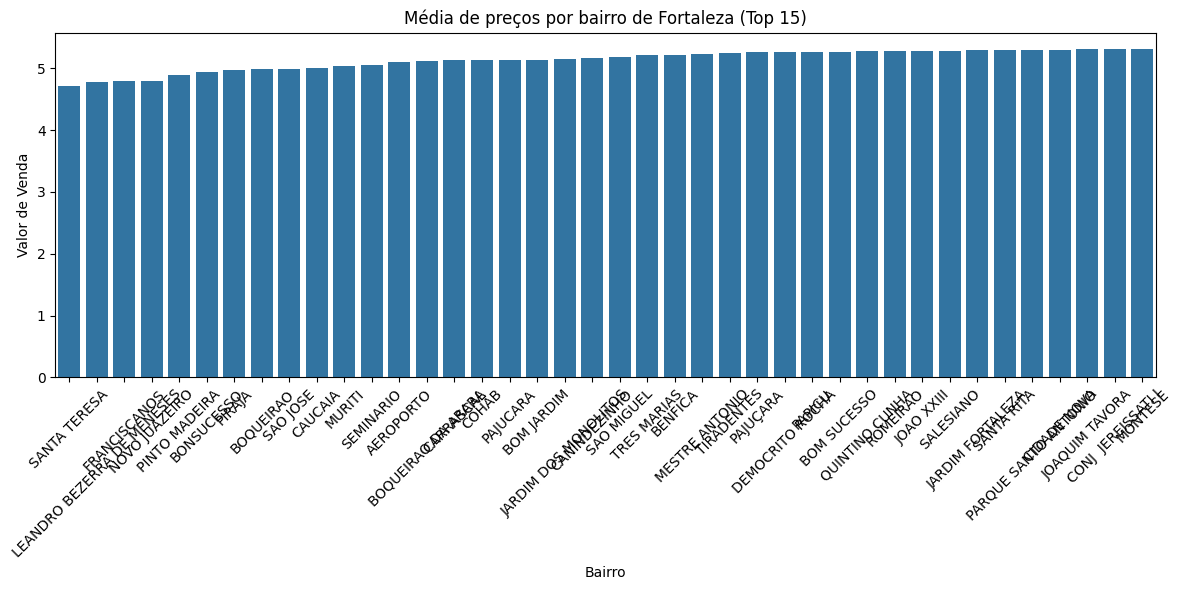

In [ ]:
plt.figure(figsize=(12, 6))

dados_filtrados = media_fortaleza_bairro.sort_values(ascending=True).reset_index().head(40)

sns.barplot(data=dados_filtrados, x="Bairro", y="Valor de Venda")

plt.xticks(rotation=45)
plt.title("Média de preços por bairro de Fortaleza (Top 15)")
plt.tight_layout()  # Dá uma ajustada automática no layout
plt.show()


In [ ]:
janeiro = pd.read_csv("janeiro.csv", sep=";")
fevereiro = pd.read_csv("fevereiro.csv", sep=";")
marco = pd.read_csv("março.csv", sep=";")
abril = pd.read_csv("abril.csv", sep=";")
maio = pd.read_csv("maio.csv", sep=";")
junho = pd.read_csv("junho.csv", sep=";")
julho = pd.read_csv("julho.csv", sep=";")
agosto = pd.read_csv("agosto.csv", sep=";")
setembro = pd.read_csv("setembro.csv", sep=";")
outubro = pd.read_csv("outubro.csv", sep=";")
novembro = pd.read_csv("novembro.csv", sep=";")
dezembro = pd.read_csv("dezembro.csv", sep=";")


In [ ]:
# Lista de todos os dataframes
todos_os_datasets = [janeiro, fevereiro, marco, abril, maio, junho, julho, agosto, setembro, outubro, novembro, dezembro]

# Concatenar todos os datasets em um único DataFrame
dados_completos = pd.concat(todos_os_datasets, ignore_index=True)

# Salvar o DataFrame concatenado em um arquivo CSV
output_path = '/content/dados_completos_2024.csv'
dados_completos.to_csv(output_path, index=False)

# Exibir o caminho do arquivo gerado para garantir que ele foi salvo corretamente
output_path


'/content/dados_completos_2024.csv'